In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [5]:
#%% Read in data 
fp = '/Users/alexbruefach/Documents/GitHub/DSproject-covid-stress-impact/datasets/cov19tracker_cleaned.csv'
ucl_df = pd.read_csv(fp)
ucl_df

,Unnamed: 0,state,year-month,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,...,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11
0,0,California,2020-02-01,02/04/2020 08:11,Female,33.0,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Pennsylvania,2020-02-01,02/04/2020 08:12,Male,38.0,4,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Florida,2020-02-01,02/04/2020 08:15,Female,48.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,California,2020-02-01,02/04/2020 08:15,Male,31.0,5,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Florida,2020-02-01,02/04/2020 08:15,Female,69.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65855,32925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,
65856,32926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,
65857,32927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,
65858,32928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,


In [6]:
#%% Drop rows with no data
ucl_df['household_size'].value_counts()
ucl_df['household_children'].value_counts()

ucl_df = ucl_df[ucl_df['household_children']!='Prefer not to say']
ucl_df = ucl_df[ucl_df['household_children']!="Don't know"]

ucl_df['household_children'].value_counts()

0            20761
1             4655
2             3886
3             1676
4              771
5 or more      582
Name: household_children, dtype: int64

In [8]:
ucl_df['PHQ4_1'].value_counts()

                           13563
Not at all                  9322
Several days                5072
More than half the days     2502
Nearly every day            1949
Prefer not to say            522
Name: PHQ4_1, dtype: int64

In [9]:
#%% divide datasets to pre-vaccine and post-vaccine 
ucl_df['year-month'].value_counts()
ucl_df['year-month'] = pd.to_datetime(ucl_df['year-month'])

vaccine_date = datetime.datetime(2021, 5, 1)
pre_vaccine = ucl_df[ucl_df['year-month'] < vaccine_date ]
post_vaccine = ucl_df[ucl_df['year-month'] >= vaccine_date ]

In [11]:
pre_vaccine.shape

(20466, 39)

In [30]:
post_vaccine.household_children.unique().shape

(6,)

In [31]:
post_vaccine.household_size.unique().shape

(10,)

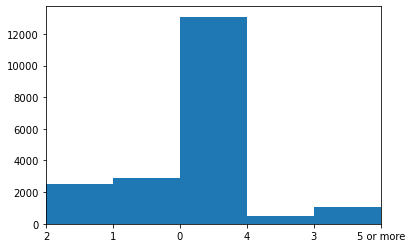

In [28]:
#%% Histogram of Household Children
plt.xlim([0, 5])
plt.hist(pre_vaccine['household_children'], bins=range(0,10))
plt.show()

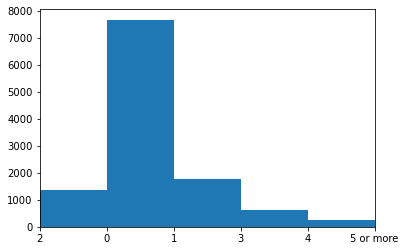

In [27]:
plt.xlim([0, 5])
plt.hist(post_vaccine['household_children'], bins=range(0,10))
plt.show()

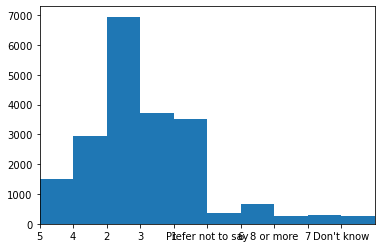

In [29]:
#%% Histogram of Household size 
plt.xlim([0, 10])
plt.hist(pre_vaccine['household_size'], bins=range(0,20))
plt.show()

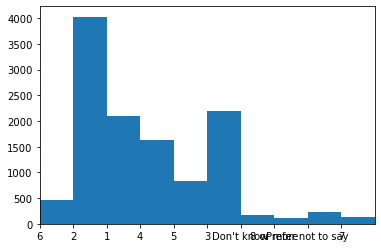

In [32]:
plt.xlim([0, 10])
plt.hist(post_vaccine['household_size'], bins=range(0,20))
plt.show()